In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings(action = 'ignore')

In [3]:
data = pd.read_csv('women.csv')
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
for i in data.iloc[: , 5 : ].columns:
    print(f'{i} : {data[i].nunique()}')

Rating : 5
Recommended IND : 2
Positive Feedback Count : 82
Division Name : 3
Department Name : 6
Class Name : 20


# Undestanding Data

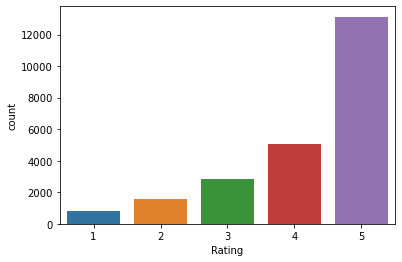

In [5]:
sns.countplot(data['Rating']);

-  Most of the rating are 3-5 which describe product quality are good

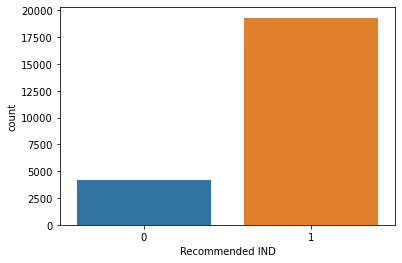

In [6]:
sns.countplot(data['Recommended IND']);

- Most of the women recommended the products

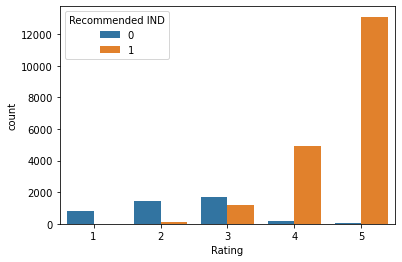

In [7]:
sns.countplot(data['Rating'], hue = data['Recommended IND']);

>  Good rating means product will be recommended

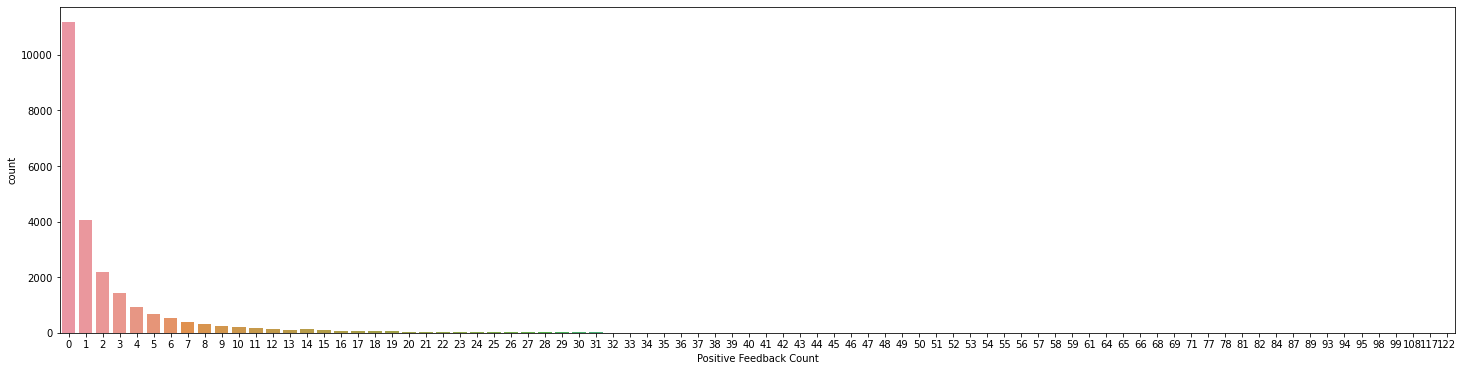

In [8]:
plt.figure(figsize = (25,6))
sns.countplot(data['Positive Feedback Count']);

In [9]:
drop_positive = data[data['Positive Feedback Count'] > 20].index

In [10]:
data = data.drop(drop_positive, axis = 0).reset_index(drop = True)

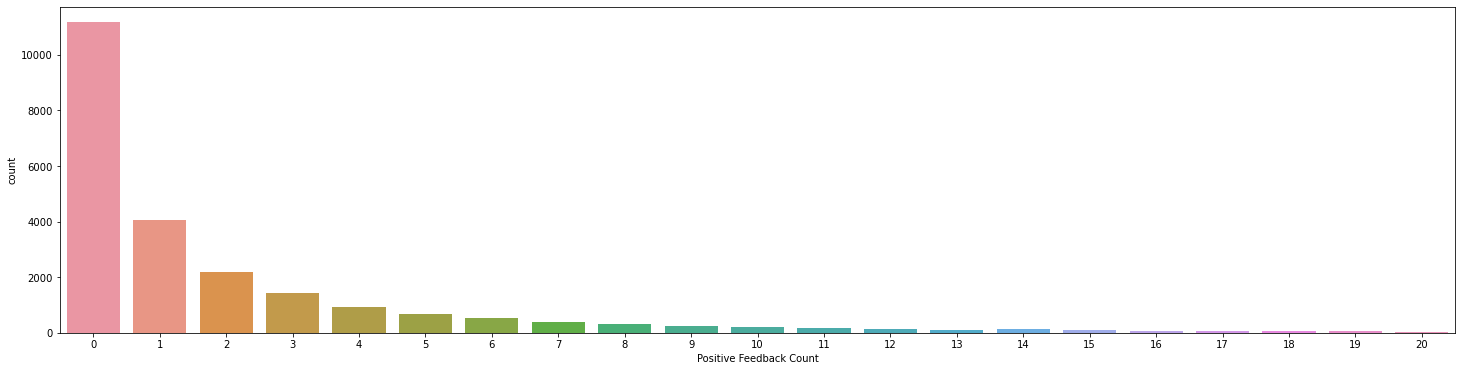

In [11]:
plt.figure(figsize = (25,6))
sns.countplot(data['Positive Feedback Count']);

In [12]:
data.shape

(23096, 11)

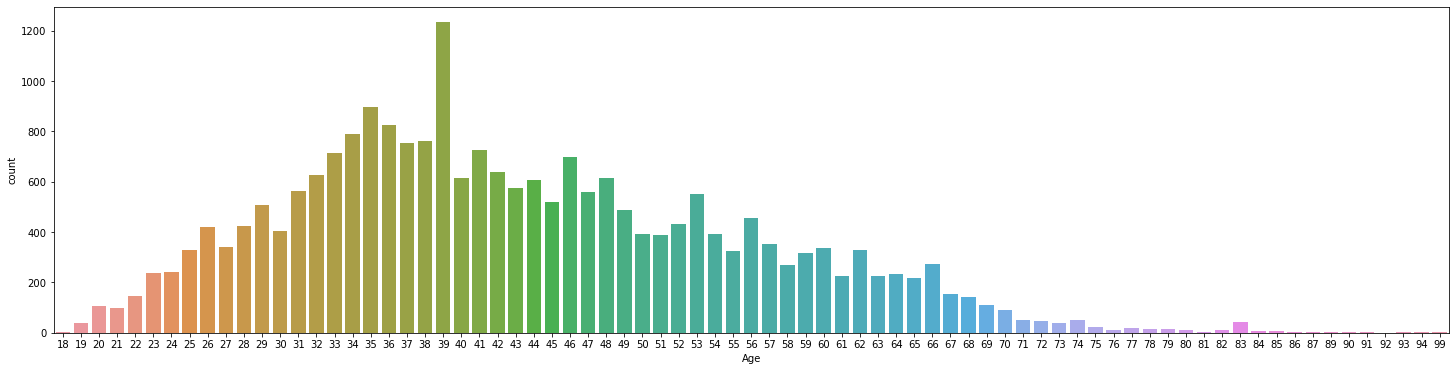

In [13]:
plt.figure(figsize = (25,6))
sns.countplot(data['Age']);

- Age 35 to 45 are big buyers

- Because people of this age tends to have more money than teens or senior citizens.

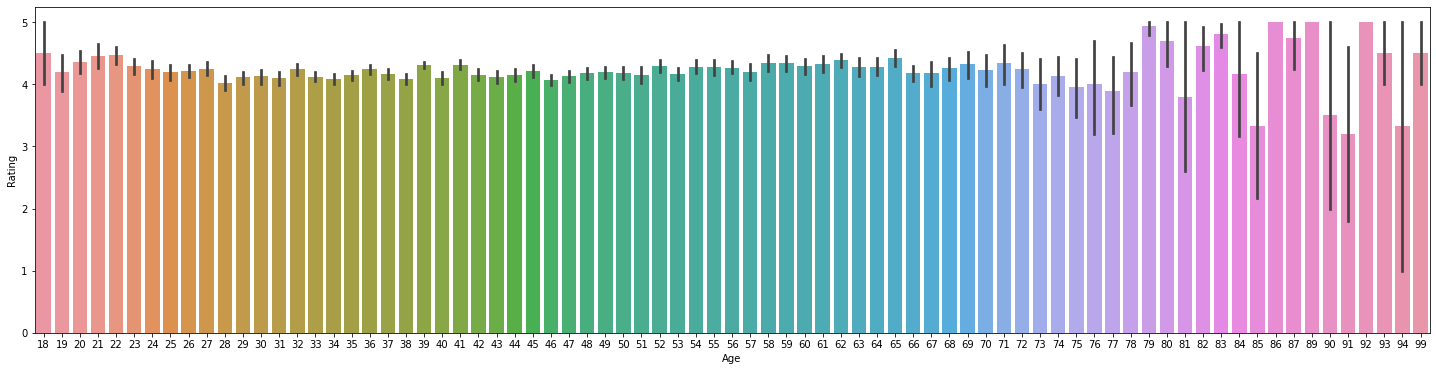

In [15]:
plt.figure(figsize = (25,6))
sns.barplot(x = data['Age'], y = data['Rating']);

- Average Rating by each age group 

- Lowest for 84 , 90, 91 & 94

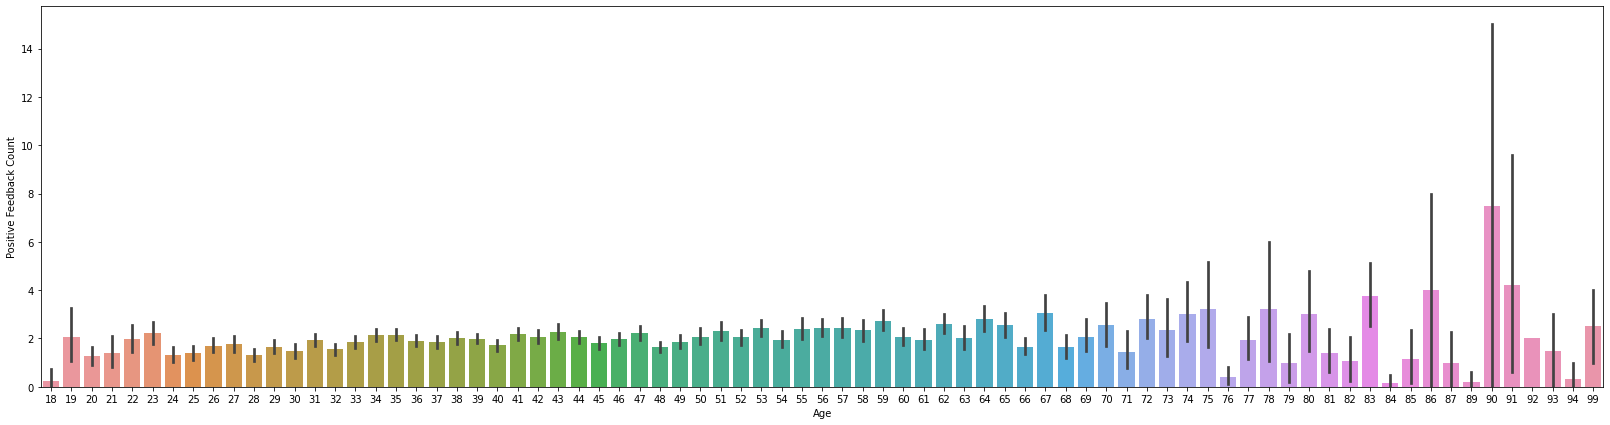

In [17]:
plt.figure(figsize = (28,7))
sns.barplot(x = data['Age'], y = data['Positive Feedback Count']);

- Highest for 90 but lowest for 84 and 94

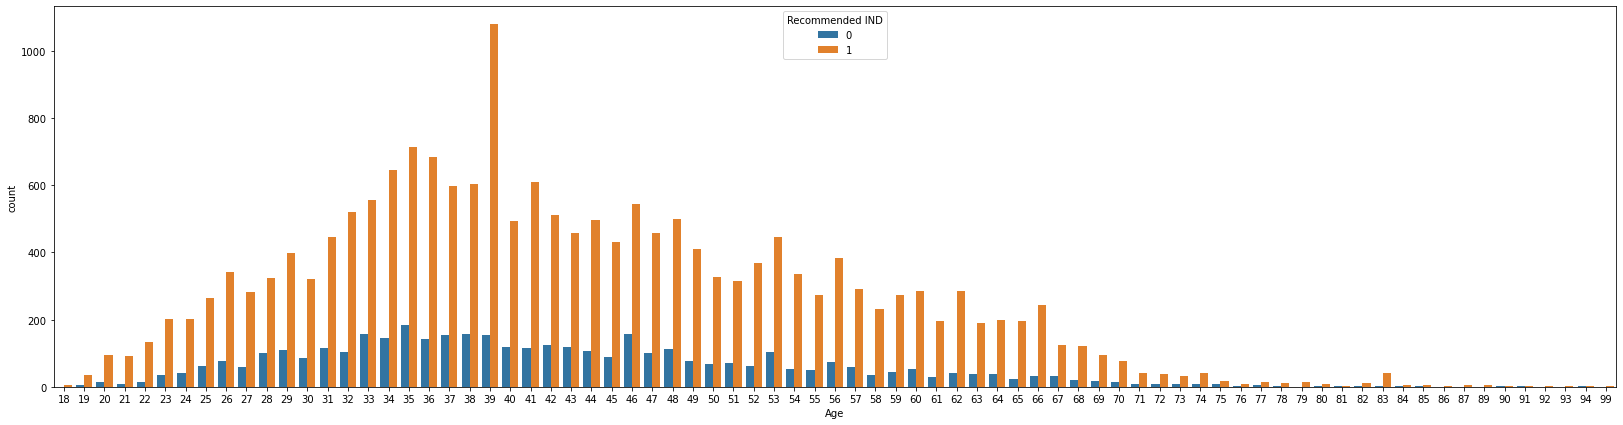

In [18]:
plt.figure(figsize = (28,7))
sns.countplot(data['Age'], hue = data['Recommended IND']);

- We can see here buying is directly proprtional to Recommendations

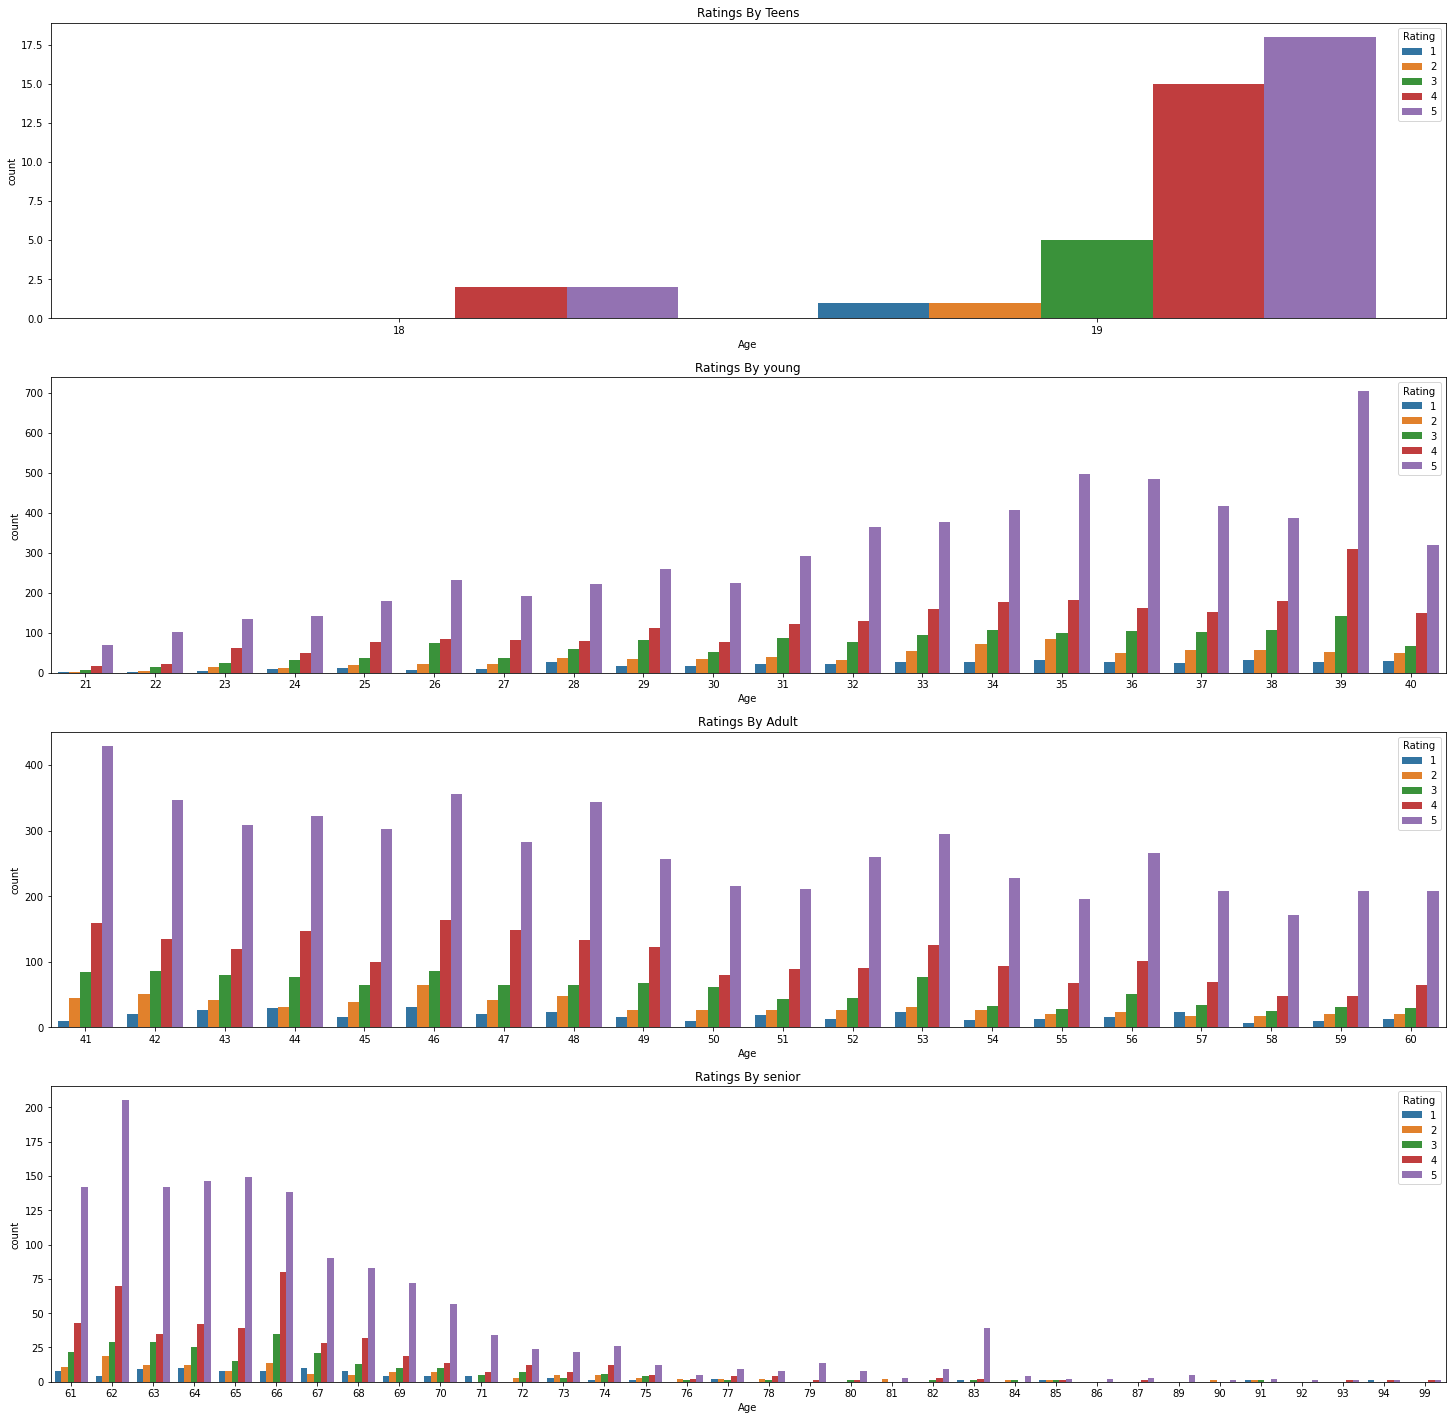

In [19]:
teens = data[data['Age'] < 20]
youngs= data[(data['Age'] > 20) & (data['Age'] <= 40)]
adult = data[(data['Age'] > 40) & (data['Age'] <= 60)]
senior = data[data['Age'] > 60]
plt.figure(figsize = (25,25))
plt.subplot(4,1,1)
sns.countplot(teens['Age'], hue = data['Rating'])
plt.title('Ratings By Teens')
plt.subplot(4,1,2)
sns.countplot(youngs['Age'], hue = data['Rating'])
plt.title('Ratings By young')
plt.subplot(4,1,3)
sns.countplot(adult['Age'], hue = data['Rating'])
plt.title('Ratings By Adult')
plt.subplot(4,1,4)
sns.countplot(senior['Age'], hue = data['Rating'])
plt.title('Ratings By senior')
plt.legend(loc = 'upper right',title = 'Rating')
plt.show()

- Adult Women are buying more and giving good rating rather than youngsters.

In [20]:
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [21]:
data['Class Name'].value_counts()

Dresses           6149
Knits             4764
Blouses           3045
Sweaters          1412
Pants             1375
Jeans             1138
Fine gauge        1087
Skirts             940
Jackets            693
Lounge             683
Swim               348
Outerwear          323
Shorts             316
Sleep              227
Legwear            165
Intimates          154
Layering           144
Trend              116
Casual bottoms       2
Chemises             1
Name: Class Name, dtype: int64

# Word Cloud

#### Checking Null Values

In [22]:
data.isna().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3761
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

#### Dropping All Null Values

In [23]:
data = data.dropna().reset_index(drop = True)

## Word Cloud For Review Text

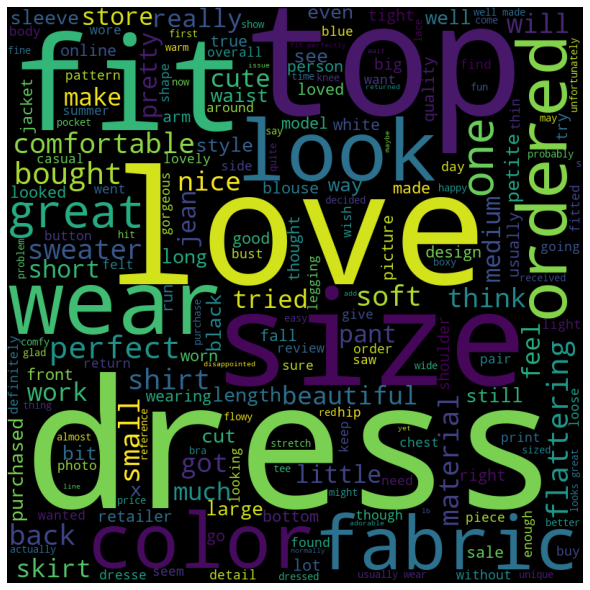

In [24]:
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through Column
for val in data['Review Text']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='Black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## Word Cloud For Title

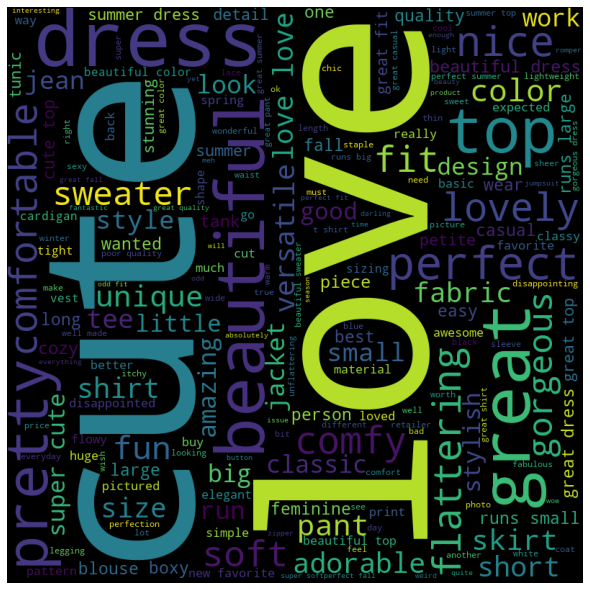

In [25]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through Column
for val in data['Title']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='Black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

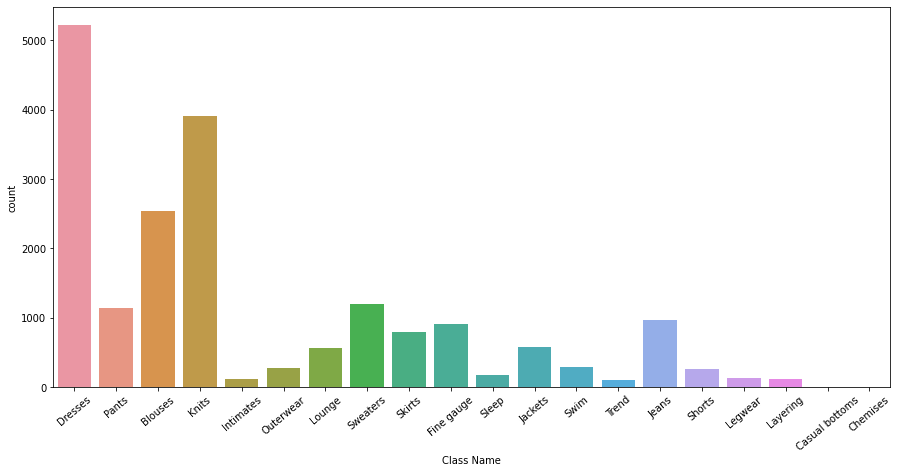

In [23]:
plt.figure(figsize = (15, 7))
sns.countplot(data['Class Name'])
plt.xticks(rotation = 40)
plt.show()

- **Dresses , Knits , Blouses are the most sold items**

## Histograms

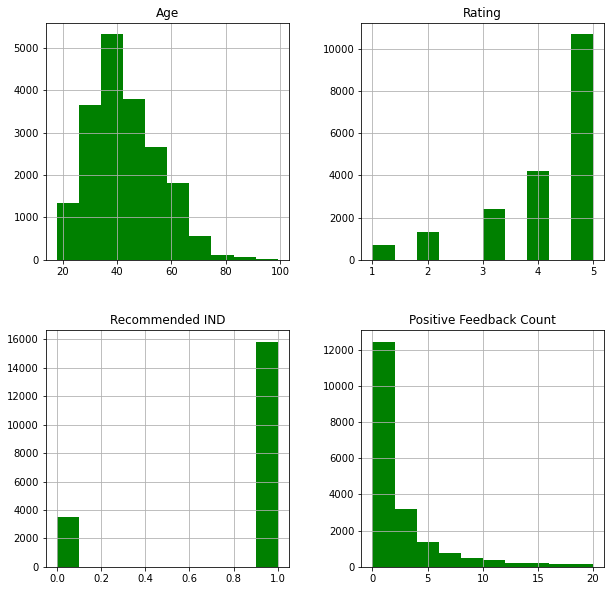

In [26]:
num_cols = data.select_dtypes(exclude = 'object')
num_cols = num_cols.drop(['Unnamed: 0','Clothing ID'], axis = 1)
num_cols.hist(figsize = (10,10), color = 'green');

## Boxplots

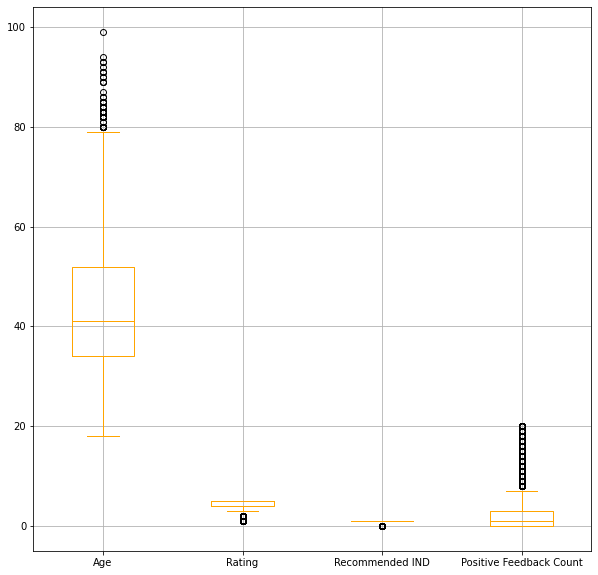

In [27]:
num_cols.boxplot(figsize = (10,10), color = 'orange');

## Distribution Plots

<function matplotlib.pyplot.show(close=None, block=None)>

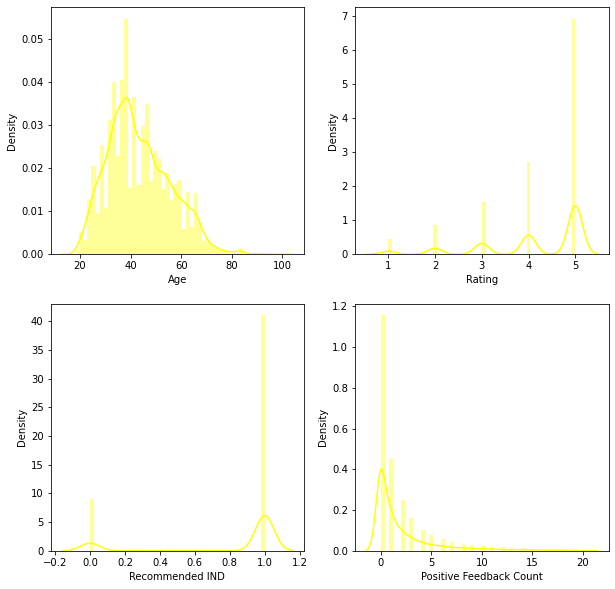

In [28]:
plt.figure(figsize = (10,10))
for i in enumerate(num_cols.columns):
    plt.subplot(2,2, i[0] +1)
    sns.distplot(num_cols[i[1]],kde = True, color = 'yellow')
plt.show

## Individual Boxplots

<function matplotlib.pyplot.show(close=None, block=None)>

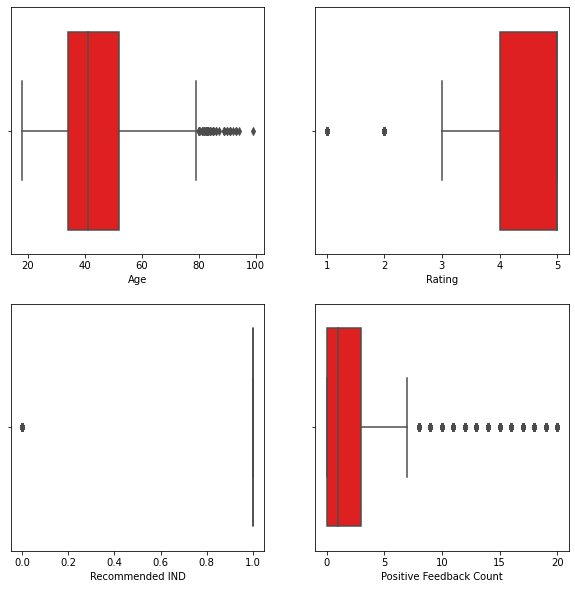

In [29]:
plt.figure(figsize = (10,10))
for i in enumerate(num_cols.columns):
    plt.subplot(2,2, i[0] +1)
    sns.boxplot(num_cols[i[1]], color = 'red')
plt.show

## Correlation Heatmap

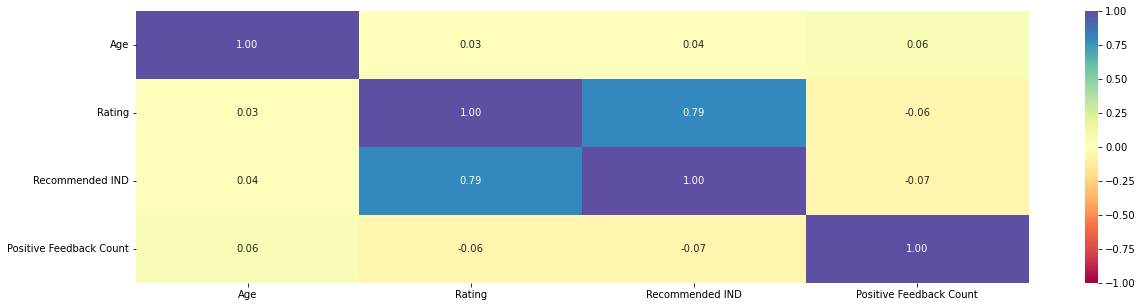

In [30]:
plt.figure(figsize=(20, 5))
sns.heatmap(num_cols.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

-  **Recommendation and ratings are showing good correlation, i.e, Directly Proportional to each other.**

# Clustering

In [31]:
data.head(1)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses


In [32]:
new_df = data[['Age', 'Rating','Recommended IND', 'Positive Feedback Count', 'Division Name','Department Name','Class Name']]

In [33]:
new_df.head()

,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,60,3,0,0,General,Dresses,Dresses
1,50,5,1,0,General Petite,Bottoms,Pants
2,47,5,1,6,General,Tops,Blouses
3,49,2,0,4,General,Dresses,Dresses
4,39,5,1,1,General Petite,Tops,Knits


In [34]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

## Label Encoding Categorical Columns

In [35]:
le = LabelEncoder()
for col in new_df.iloc[:,4 : ].columns:
    new_df[col] = le.fit_transform(new_df[col])

In [36]:
new_df.head()

,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,60,3,0,0,0,1,3
1,50,5,1,0,1,0,13
2,47,5,1,6,0,4,0
3,49,2,0,4,0,1,3
4,39,5,1,1,1,4,8


## Scaling Data

In [37]:
scaler = StandardScaler()
scaler.fit(new_df)
scaled_df = pd.DataFrame(scaler.transform(new_df), columns = new_df.columns, index = new_df.index)
scaled_df.head()

,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,1.366675,-1.069091,-2.132423,-0.606148,-0.767530,-0.826825,-0.754898
1,0.551463,0.731616,0.468950,-0.606148,0.866929,-1.438851,1.157112
2,0.306900,0.731616,0.468950,1.128572,-0.767530,1.009251,-1.328501
3,0.469942,-1.969444,-2.132423,0.550332,-0.767530,-0.826825,-0.754898
4,-0.345270,0.731616,0.468950,-0.317028,0.866929,1.009251,0.201107


## K-Means Algorithm

In [38]:
error = []
for k in range(1,11):
    km = KMeans(n_clusters = k)
    km.fit_predict(scaled_df)
    error.append(km.inertia_)

## Elbow Method for Best K value

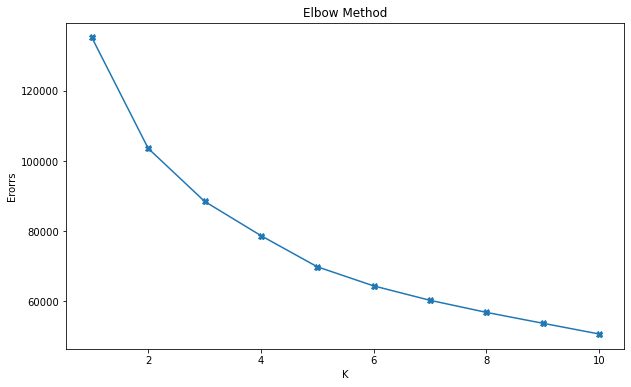

In [39]:
plt.figure(figsize = (10,6))
plt.plot(list(range(1,11)), error, marker = 'X')
plt.title('Elbow Method')
plt.xlabel('K')
plt.ylabel('Erorrs')
plt.show()

-  I am Little confused in 3 or 5

### Silhouette Coefficient

- One of the metrics to evaluate the quality of clustering is referred to as silhouette analysis. Silhouette analysis can be applied to other clustering algorithms as well. Silhouette coefficientranges between −1 and 1, where a higher silhouette coefficient refers to a model with more coherentclusters.



- The Silhouette Coefficient is calculated using the mean intra-cluster distance ( a) and the mean nearest-cluster distance ( b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max (a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of.


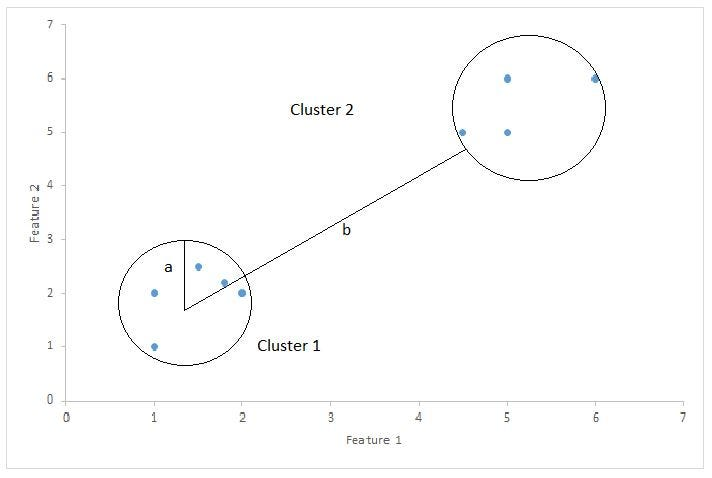

In [42]:
from sklearn.metrics import silhouette_score

In [43]:
sil_score = []
for k in range(2,11):
    km = KMeans(n_clusters = k)
    pred = km.fit_predict(scaled_df)
    score = silhouette_score(scaled_df, pred)
    sil_score.append(score)
    print(f'Silhouette Score for K = {k} is {score}')

Silhouette Score for K = 2 is 0.33015134965171683
Silhouette Score for K = 3 is 0.2156468473109423
Silhouette Score for K = 4 is 0.22674160321245745
Silhouette Score for K = 5 is 0.23862807754027696
Silhouette Score for K = 6 is 0.23448855556074166
Silhouette Score for K = 7 is 0.22695460667906933
Silhouette Score for K = 8 is 0.2196918416761983
Silhouette Score for K = 9 is 0.22024873675997048
Silhouette Score for K = 10 is 0.2275503333131384


### Silhouette Score Plot

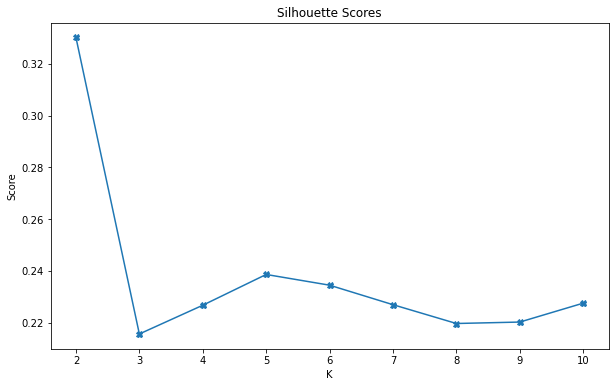

In [44]:
plt.figure(figsize = (10,6))
plt.plot(list(range(2,11)), sil_score, marker = 'X')
plt.title('Silhouette Scores')
plt.xlabel('K')
plt.ylabel('Score')
plt.show()

-  **For K = 5 Sillhouette is higher than 3 or 4 so optimum no. of clusters should be 5**

# KMeans for K = 5

In [45]:
model = KMeans(n_clusters = 5, random_state = 1)
model.fit_predict(scaled_df)

array([0, 4, 1, ..., 1, 0, 2])

# Adding Labels to new_df and scaled_df

In [46]:
scaled_df['Labels'] = model.labels_
new_df['Labels'] = model.labels_
new_df.sample(5)

,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Labels
11534,29,5,1,1,1,4,17,4
14694,30,5,1,0,0,4,8,1
11198,60,5,1,3,0,1,3,2
10636,25,4,1,1,2,2,18,4
6455,65,5,1,0,1,3,6,1


In [47]:
new_df.Labels.value_counts()

1    6760
2    5776
0    3275
4    2174
3    1336
Name: Labels, dtype: int64

# Cluster Profiling

In [48]:
new_df2 = data[['Age', 'Rating','Recommended IND', 'Positive Feedback Count', 'Division Name','Department Name','Class Name']]

In [49]:
new_df2['Labels'] = new_df['Labels']
new_df2.head()

,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Labels
0,60,3,0,0,General,Dresses,Dresses,0
1,50,5,1,0,General Petite,Bottoms,Pants,4
2,47,5,1,6,General,Tops,Blouses,1
3,49,2,0,4,General,Dresses,Dresses,0
4,39,5,1,1,General Petite,Tops,Knits,1


In [50]:
# Overall level summary
new_df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,19321.0,43.235340,12.267065,18.0,34.0,41.0,52.0,99.0
Rating,19321.0,4.187413,1.110704,1.0,4.0,5.0,5.0,5.0
Recommended IND,19321.0,0.819730,0.384422,0.0,1.0,1.0,1.0,1.0
Positive Feedback Count,19321.0,2.096527,3.458860,0.0,0.0,1.0,3.0,20.0
Labels,19321.0,1.605300,1.179580,0.0,1.0,1.0,2.0,4.0


#### Cluster means

In [54]:
cluster_means = new_df2.groupby('Labels').mean().reset_index()
cluster_means.style.highlight_max(color="lightpink", axis=0)

,Labels,Age,Rating,Recommended IND,Positive Feedback Count
0,0,42.255878,2.274504,0.001527,1.976794
1,1,44.135799,4.601331,0.999112,1.142899
2,2,42.344010,4.598338,0.999134,1.252424
3,3,45.677395,4.309880,0.876497,12.093563
4,4,42.778289,4.614995,0.982981,1.341306


In [56]:
cluster_means.style.highlight_min(color="lightgreen", axis=0)

,Labels,Age,Rating,Recommended IND,Positive Feedback Count
0,0,42.255878,2.274504,0.001527,1.976794
1,1,44.135799,4.601331,0.999112,1.142899
2,2,42.344010,4.598338,0.999134,1.252424
3,3,45.677395,4.309880,0.876497,12.093563
4,4,42.778289,4.614995,0.982981,1.341306


- **Cluster 1 ,2 & 4 giving best ratings as well as recommending products**

- **Cluster 0 consists of women giving least ratings and least recommendation but Positive feedback Count is higher**

- **Cluster 3 is women with satisfactory ratings and Recommendations.**

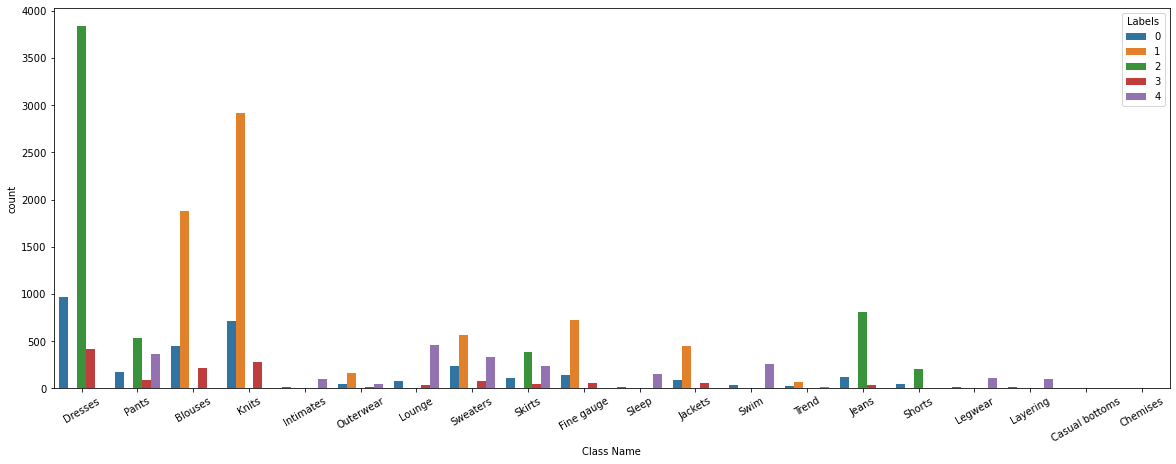

In [57]:
plt.figure(figsize = (20,7))
sns.countplot(x = new_df2['Class Name'], hue = new_df2['Labels'])
plt.xticks(rotation = 30)
plt.legend(loc = 'upper right', title = "Labels")
plt.show()

> **Women in Cluster 2 tensds to buy Dresses, Pants, Skirts, Jeans and Shorts**

> **Women in Cluster 1 are more interested in Blouses, Knits, Sweaters, Fine Gauge and Jackets.**

> **Cluster 4 are more attracted to Pants, Lounge , Sweaters, skirts , Swim , Legwear and Layering.**

> **Cluster 3 are less in no. and buying mostly Dresses, Pants , Blouses and Knits.**

> **Women in cluster 0 shownig average approach like cluster 3.**

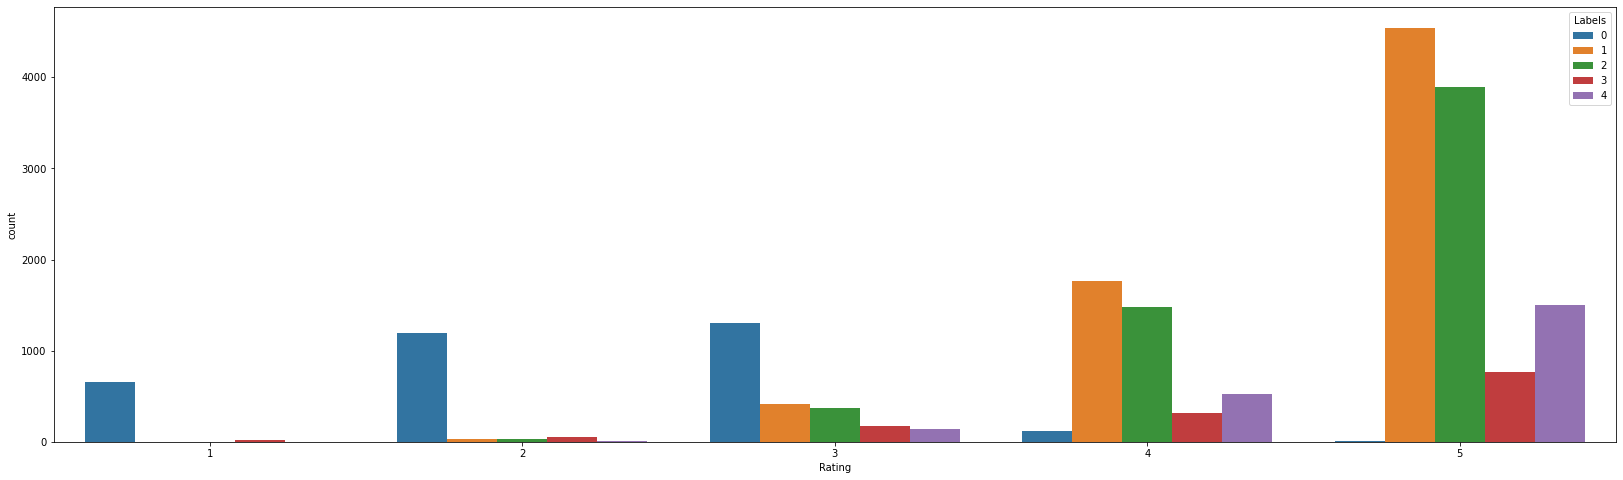

In [58]:
plt.figure(figsize = (28,8))
sns.countplot(x = new_df2['Rating'], hue = new_df2['Labels'])
plt.legend(loc = 'upper right', title = "Labels")
plt.show()

- **Women in Cluster 0 giving 1,2 & 3 rating out if 5, which is least in all of the cluster groups**
- **Rest of the Clusters giving good average rating.**

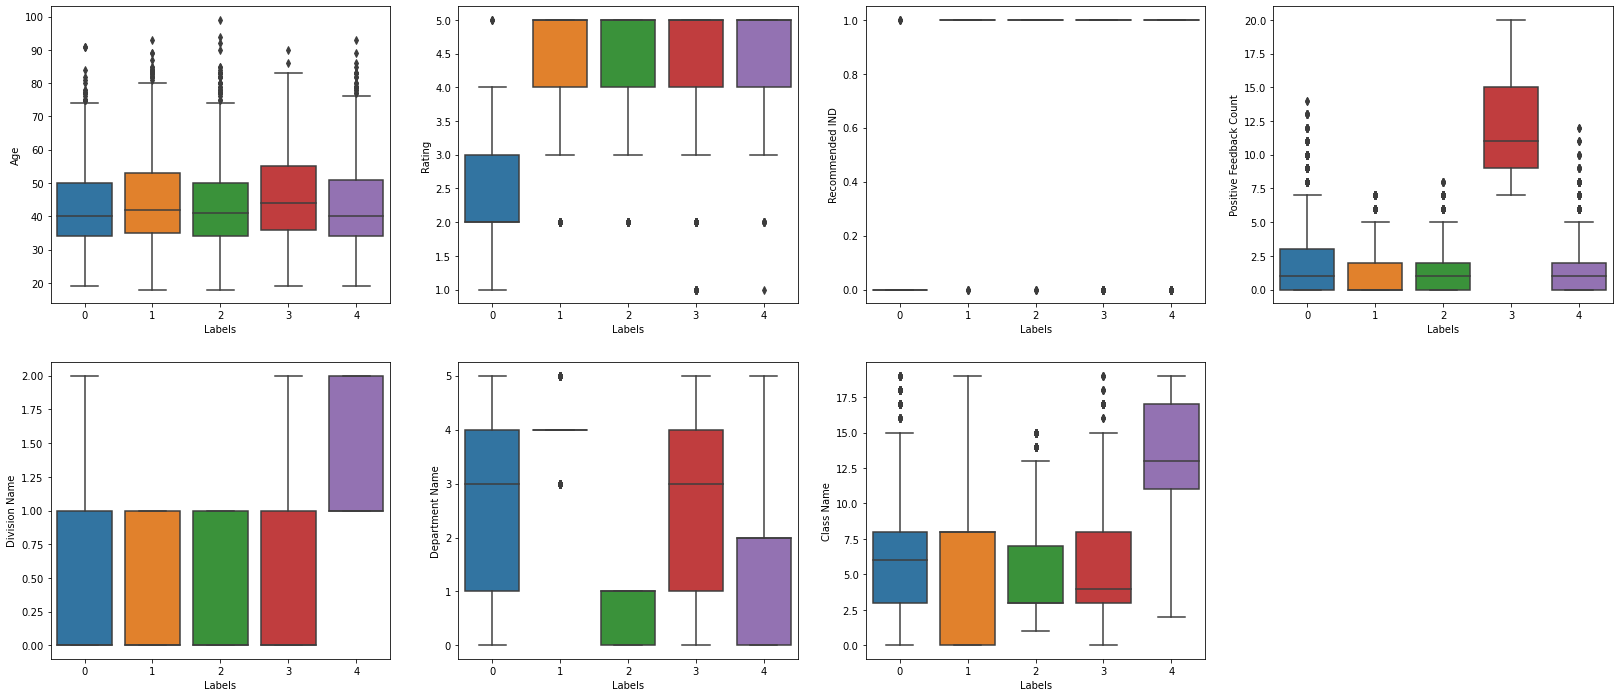

In [59]:
plt.figure(figsize = (28,12))
for i in enumerate(new_df.iloc[:, 0 : 7].columns):
    plt.subplot(2, 4 , i[0] + 1)
    sns.boxplot(y = new_df[i[1]], x = new_df['Labels'])
plt.show()

In [60]:
le.classes_

array(['Blouses', 'Casual bottoms', 'Chemises', 'Dresses', 'Fine gauge',
       'Intimates', 'Jackets', 'Jeans', 'Knits', 'Layering', 'Legwear',
       'Lounge', 'Outerwear', 'Pants', 'Shorts', 'Skirts', 'Sleep',
       'Sweaters', 'Swim', 'Trend'], dtype=object)

#### Cluster 0

> Age between 35 & 50 is majority

> Giving Lowest Ratings, Lowest Recommendations

> Buying more Dresses, Fine Gauge, Intimates, Jackets, Jeans etc.

#### Cluster 1

> Age 35- 55

> Good Rating + Good Recommendations

> Buying mostly Blouses, Casual bottoms, Chemises, Dresses, Fine gauge, Intimates, Jackets & Jeans.

#### Cluster 2

> Age 35 - 50 majority

> Good Rating + Good Recommendations

> Buying alsmost similar product to cluster 0 but more satisfied.

#### Cluster 3

> Majority of age 47- 57

> Good Rating + Good Recommendations

> Similar Buying patterns to cluster 0 ,1 and 2 but more skewed to left side

#### Cluster 4

> Age between 35 & 50 is majority

> Good Rating + Good Recommendations

> Buying Lounge, Outerwear, Pants, Shorts, Skirts, Sleep, Sweaters, Swim & Trend cloths

# Conclusions

- Women Between 35 - 55 of Age are Big Buyers and also giving good reviews and ratings.

- We should target this age group to increase sales.

- Women of Age between 35 - 55 having more money and more purchasing power than young and Old aged Women.

> 